In [1]:
# IMPORTS
import requests
import base64
import json
import requests
import numpy
from sklearn.decomposition import PCA
import pandas
from sklearn.cluster import BisectingKMeans
import matplotlib.pyplot as plt

In [2]:
# GLOBAL VARIABLES
client_id = 'ce7fc85dbeaa40588c0a73a324a7654b'
client_secret = '8388086841354dd4bada7a48dfe91b72'

In [3]:
# FUNCTIONS
# Retrieves and convert token for using at Spotify's API
def get_token() :
    auth_string = client_id + ":" + client_secret
    auth_bytes = auth_string.encode("utf-8")
    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")

    url = 'https://accounts.spotify.com/api/token'
    headers = {
        "Authorization" : "Basic " + auth_base64,
        "content-Type" : "application/x-www-form-urlencoded"
    }
    data = {"grant_type" : "client_credentials"}

    result = requests.post(url, headers = headers, data = data)

    json_result = json.loads(result.content)
    token = json_result["access_token"]

    return token

In [4]:
# Gives token a usable format to use in headers when requesting from API
def get_auth_header(token):
    return {"Authorization" : "Bearer " + token}

In [5]:
# Retrieves infomation from API from several tracks with their spotify ID's separeted by a coma (max 50 spotify ID's)
def search_several_tracks(token, tracks):
    url = 'https://api.spotify.com/v1/tracks'
    headers = get_auth_header(token)
    query = f"?ids={tracks}"

    query_url = url + query

    result = requests.get(query_url, headers=headers)

    json_result = json.loads(result.content)

    print(json_result)

In [6]:
# Retrieves audio analysis from API from a single track
def audio_analysis(token, track_id):
    url = 'https://api.spotify.com/v1/audio-analysis/'
    headers = get_auth_header(token)
    query_url = url + track_id

    result = requests.get(query_url, headers = headers)

    json_result = json.loads(result.content)

    return json_result

In [7]:
# Retrieves information from API from a single track
def audio_information(token, track_id):
    url = 'https://api.spotify.com/v1/tracks/'
    headers = get_auth_header(token)
    query_url = url + track_id

    result = requests.get(query_url, headers = headers)

    json_result = json.loads(result.content)

    return json_result

In [8]:
# Returns a list whit general info from a track analysis (duration, loudness, tempo, time_signature, key, mode)
def creates_general_info(track_analysis):
    track = track_analysis["track"]
    general = [track["loudness"], track["tempo"], track["time_signature"], track["key"], track["mode"]]
    
    return general

In [9]:
# Returns pitches of each segment from a track analysis
def creates_pitches_info(track_analysis):
    pitches = []
    for segment in track_analysis["segments"] :
        pitches.append(segment["pitches"])

    return pitches

In [10]:
# Returns timbres of each segment from a track analysis
def creates_timbre_info(track_analysis):
    timbres = []
    for segment in track_analysis["segments"] :
        timbres.append(segment["timbre"])

    return timbres

In [11]:
# Applies PCA to a list of values returnins only 'components parameter' number of principal componentes
def pca(info, components) :
    pca = PCA(n_components=components)
    x = pca.fit_transform(info)

    return x

In [12]:
# Creates a single list concatenating general info, pitches_pca info and timbre_pca info
def concatenate_info(general, pitches, timbre):
    for pitch in pitches :
        general.append(pitch[0])

    for timbr in timbre :
        general.append(timbr[0])

    return general

In [13]:
# Processes a single track by their Spotify ID creating our usable analysis
def track_analysis(token, trackID):
    track_analysis = audio_analysis(token, trackID)

    track_data = creates_general_info(track_analysis)

    return track_data

def bisecting_KMeans(data_set, cluster_number):
    bisect_means = BisectingKMeans(n_clusters=cluster_number)

    return bisect_means.fit_transform(data_set)

In [14]:
# MAIN
# Retrieves a token
token = get_token()

In [15]:
# Opens a .txt file containing track's spotify ID's *each track must end with a newline and the EOF is represented by a blank line* 
tracks = open('uniqueids.txt', 'r')

In [16]:
# Creates a dataframe to store tracks analysis
data_set = pandas.DataFrame()

In [17]:
# Creates a list to store song_name - artist_name
row_names = []

In [18]:
# Iterate over .txt file concatenating each track analysis and name - artist on data_set data frame
for track in tracks :
    track = str(track) # El id del track lo convierte a string
    track = track[:-1] # Cada id se compone de la siguiente manera: string + '\n'
                       # con esta indicación quitamos el '\n' para que la API pueda leer el id.
    try:
        aux = track_analysis(token, track) # Sacamos una lista con los datos de analisis de cada cancion. Ver linea 80
        data_set = pandas.concat([data_set, pandas.DataFrame([aux])], axis = 0) # Añadimos el analisis recien obtenido al final del data frame
        track_information = audio_information(token, track) # Obtenemos información general de la canción. Ver linea 68
        name = track_information["name"] # Obtenemos el nombre de la canción
        band = track_information["artists"][0]["name"] # Obtenemos el nombre del artista
        new_row = f'{name} - {band}' # hacemos una nueva strin name + band
        row_names.append(new_row) # Añadimos el string a una lista que guarda todos los nombres
    except:
        print("Error en el track: " + track)
        continue
print(data_set)

Error en el track: 5N5fp1lYSORdZbWanACki9
Error en el track: 4qDw65LRA3tT1ZDmghkgFA1nsoufODs1GSaPI9oV9X6T
Error en el track: 6lqlmE3cijnkWo3HmDQ9w2
Error en el track: 53J0MZswXsuJfgG6kR3m32
Error en el track: 3UA8Vjo0hQXGJnoeQF1SOL
Error en el track: 3qnEHAJ07ZJcG5sQM9RYxS
Error en el track: 2d8D7uk3tbAThjRkdfrx9c
Error en el track: 1K89oHPxT4wRg5ocaDLq3J
Error en el track: 2WMyu5IYgxEuCd6xgFgJrl
Error en el track: 1CbxG199T0fzfUV5EO7aPV
Error en el track: 0S5c6WZFZIybLgPcxiBLIP
Error en el track: 1KxwZYyzWNyZSRyErj2ojT
Error en el track: 41L3O37CECZt3N7ziG2z7l
Error en el track: 3bOEp5lWoea80fO9FDmb0c
Error en el track: 7iy11Lhv8hdwJROTP6GGJ6
Error en el track: 2aTjxEvx7meoJXFc3qe4Xl
Error en el track: 6cIGfLHJg3pD7OF0tLZH2V
Error en el track: 7clUVcSOtkNWa58Gw5RfD4
Error en el track: 3xVCQGla5LLhrwqNS2FcHo
Error en el track: 7xjhoACcakLFgqxkp4FyXm
Error en el track: 5rgrBsAFYMun6yhtnLKRPz
Error en el track: 1J2LkITLxvfUMQfX11I0JP
Error en el track: 7F02x6EKYIQV3VcTaTm7oN
Error en el 

In [19]:
# Reducing dimensionality to 2 of the whole data set
final_data_set = pandas.DataFrame(pca(data_set, 2))

In [84]:
# Clustering by Bisecting KMeans method
trained_data = bisecting_KMeans(final_data_set, 2)

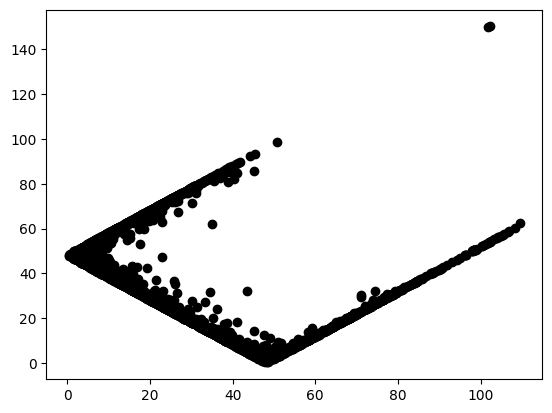

In [85]:
# Plotting trained data
x=[]
for i in range(len(trained_data)):
    x.append(trained_data[i][0])

y=[]
for i in range(len(trained_data)):
    y.append(trained_data[i][1])

plt.plot(x, y,'o', color='black')
labels = []
for i in range(len(row_names)):
    labels.append(row_names[i])

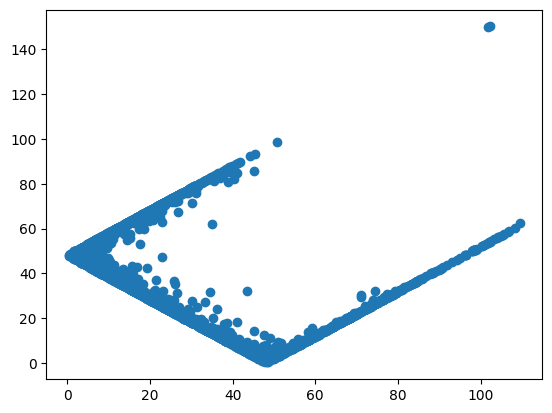

In [86]:
# Create a scatter plot
plt.scatter(x, y)

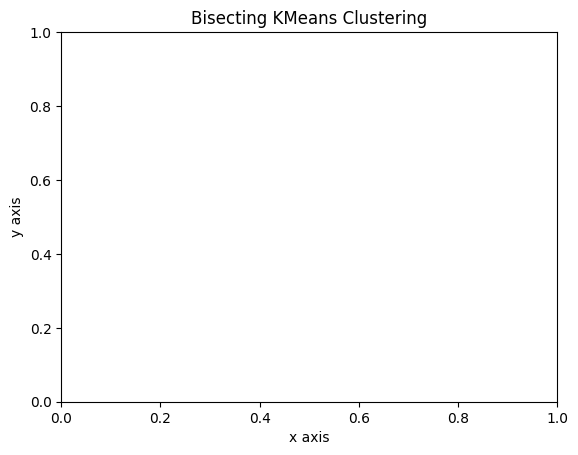

In [88]:
# Add labels to each dot
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('x axis')
plt.ylabel('y axis')

plt.title('Bisecting KMeans Clustering')
plt.show()